Link for Youtube Video : https://youtu.be/FfBsU4-I51g

Alok Vernekar : U2323215B
Yashwardhan Singh Tomar : U2323694E

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class SokobanEnv:
    def __init__(self, level):
        self.level = np.array(level)
        self.agent_pos = self.find_position(4)  # 4 represents the agent
        self.boxes = self.find_positions(2)     # 2 represents boxes
        self.walls = self.find_positions(1)     # 1 represents walls
        self.goals = self.find_positions(3)     # 3 represents goals

    def find_position(self, tile_type):
        '''Finds the first occurrence of a given tile type.'''
        pos = np.argwhere(self.level == tile_type)
        return tuple(pos[0]) if len(pos) > 0 else None

    def find_positions(self, tile_type):
        '''Finds and returns positions of a specific tile type as a frozenset.'''
        return frozenset(map(tuple, np.argwhere(self.level == tile_type)))

    def print_level(self):
        '''Prints a textual representation of the level.'''
        symbols = {0: '.', 1: '#', 2: '$', 3: '*', 4: '@', 5: '+'}
        print_level = np.vectorize(symbols.get)(self.level)
        print('\n'.join([''.join(row) for row in print_level]))
        
    def show_level(self):
        '''Displays the level as a colored heatmap.'''
        # Create a color map for different elements of the game
        cmap = mcolors.ListedColormap(['white', 'black', 'brown', 'green', 'blue'])
        # Create a norm to map the numbers to colors
        norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

        plt.figure(figsize=(10, 10))
        plt.imshow(self.level, cmap=cmap, norm=norm)
        plt.colorbar(ticks=[0, 1, 2, 3, 4])
        plt.axis('off')  # Turn off the axis
        plt.show()


In [2]:
from collections import deque

def bfs(start, is_goal, get_successors):
    '''Performs BFS to find a path from the start state to a goal state.'''
    frontier = deque([start])  # States to explore
    visited = set()  # Visited states
    came_from = {start: None}  # To reconstruct the path

    while frontier:
        current_state = frontier.popleft()
        
        if is_goal(current_state):
            return reconstruct_path(came_from, start, current_state)
        
        visited.add(current_state)
        
        for next_state in get_successors(current_state):
            if next_state not in visited and next_state not in frontier:
                frontier.append(next_state)
                came_from[next_state] = current_state
    
    return None  # No path found

def reconstruct_path(came_from, start, goal):
    '''Reconstructs the path from start to goal based on came_from data.'''
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path


In [3]:
def is_goal(state, env):
    _, box_positions = state
    return box_positions <= env.goals  # All boxes on goal positions

def get_successors(state, env):
    agent_pos, boxes = state
    successors = []
    
    # Directions the agent can move: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    for d in directions:
        new_agent_pos = (agent_pos[0] + d[0], agent_pos[1] + d[1])
        
        # Skip if the new agent position is a wall
        if new_agent_pos in env.walls:
            continue
        
        # If the new agent position has a box and the box can be pushed
        if new_agent_pos in boxes:
            new_box_pos = (new_agent_pos[0] + d[0], new_agent_pos[1] + d[1])
            
            # Check if the new box position is valid (not a wall or another box)
            if new_box_pos not in env.walls and new_box_pos not in boxes:
                # Create a new state with the box moved
                new_boxes = set(boxes)
                new_boxes.remove(new_agent_pos)
                new_boxes.add(new_box_pos)
                
                # Add the new state to the successors list
                successors.append((new_agent_pos, frozenset(new_boxes)))
        else:
            # If the new agent position doesn't have a box, just move the agent
            successors.append((new_agent_pos, boxes))
            
    return successors




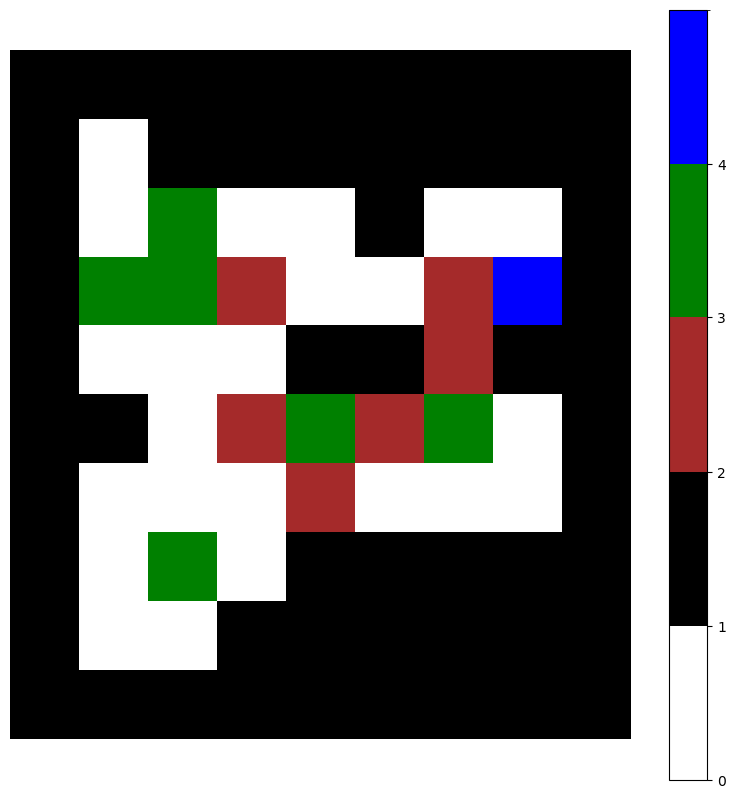

In [6]:
# Initialize your Sokoban environment with a test level
level = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 3, 0, 0, 1, 0, 0, 1],
    [1, 3, 3, 2, 0, 0, 2, 4, 1],
    [1, 0, 0, 0, 1, 1, 2, 1, 1],
    [1, 1, 0, 2, 3, 2, 3, 0, 1],
    [1, 0, 0, 0, 2, 0, 0, 0, 1],
    [1, 0, 3, 0, 1, 1, 1, 1, 1], 
    [1, 0, 0, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

env = SokobanEnv(level)
env.show_level()  # Optional: to visually check the level

# Define the start state for BFS
initial_state = (env.agent_pos, env.boxes)

# Run BFS (after defining is_goal


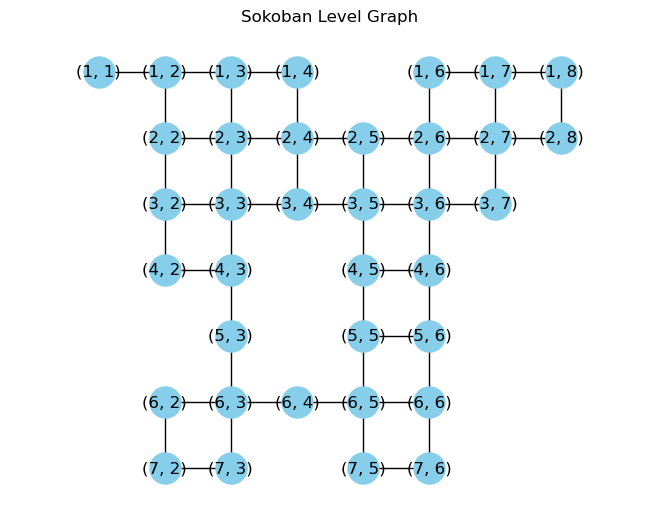

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def create_sokoban_graph(sokoban_level):
    ''' Create a graph representation of a Sokoban level
        Input : sokoban_level as a 2D list where 1 represents walls
        Output: Graph object representing the Sokoban level
    '''
    G = nx.Graph()
    rows = len(sokoban_level)
    cols = len(sokoban_level[0])

    for y in range(rows):
        for x in range(cols):
            if sokoban_level[y][x] != 1:  # 1 represents walls
                # Add nodes and connect them to their neighbors if not separated by walls
                if y > 0 and sokoban_level[y-1][x] != 1:
                    G.add_edge((x, y), (x, y-1))
                if y < rows - 1 and sokoban_level[y+1][x] != 1:
                    G.add_edge((x, y), (x, y+1))
                if x > 0 and sokoban_level[y][x-1] != 1:
                    G.add_edge((x, y), (x-1, y))
                if x < cols - 1 and sokoban_level[y][x+1] != 1:
                    G.add_edge((x, y), (x+1, y))
    return G

def show_sokoban_graph(G):
    ''' Display a Sokoban level as a graph using networkx
        Input : Graph object
        Output: Visual display of the graph
    '''
    pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Position is inverted to match array indexing
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
    
    plt.title('Sokoban Level Graph')
    plt.axis('equal')  # Ensure the scaling on both axes is equal
    plt.show()

# Define your sokoban level, for example:
sokoban_level = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 3, 0, 0, 1, 0, 0, 1],
    [1, 3, 3, 2, 0, 0, 2, 4, 1],
    [1, 0, 0, 0, 1, 1, 2, 1, 1],
    [1, 1, 0, 2, 3, 2, 3, 0, 1],
    [1, 0, 0, 0, 2, 0, 0, 0, 1],
    [1, 0, 3, 0, 1, 1, 1, 1, 1], 
    [1, 0, 0, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Create and display the graph
G = create_sokoban_graph(sokoban_level)
show_sokoban_graph(G)


In [ ]:
initial_state = (env.agent_pos, env.boxes)

# Now, run BFS, using the is_goal and get_successors functions you will define
solution = bfs(initial_state, lambda state: is_goal(state, env), lambda state: get_successors(state, env))

# If solution is not None, BFS found a path
if solution:
    print("A solution using BFS has been found!")
    # If you wish to print the steps, you need to convert states or positions to actual moves
    # This part is left for you to implement based on how you represent moves
else:
    print("No solution exists for this level.")
    
def translate_to_moves(path, env):
    moves = []
    for i in range(1, len(path)):
        previous_state, current_state = path[i - 1], path[i]
        prev_agent_pos, current_agent_pos = previous_state[0], current_state[0]
        
        # Determine the direction of the move
        dy, dx = current_agent_pos[0] - prev_agent_pos[0], current_agent_pos[1] - prev_agent_pos[1]
        if dy == -1:
            move = 'up'
        elif dy == 1:
            move = 'down'
        elif dx == -1:
            move = 'left'
        elif dx == 1:
            move = 'right'
        
        # Check if it was a push move
        prev_boxes, current_boxes = previous_state[1], current_state[1]
        if prev_boxes != current_boxes:  # Means a box was pushed
            move = 'push ' + move
        
        moves.append(move)
    
    return moves

# Assuming `solution` is the output from the BFS
if solution:
    moves = translate_to_moves(solution, env)
    print("Moves to solve the puzzle:")
    for move in moves:
        print(move)
else:
    print("No solution exists for this level.")


In [7]:
def cost_fn(current_state, next_state):
    # Moves have a cost of 1, pushing a box has a cost of 2
    current_agent_pos, current_boxes = current_state
    next_agent_pos, next_boxes = next_state
    
    if current_agent_pos in current_boxes and current_agent_pos != next_agent_pos:
        return 2  # Higher cost for pushing a box
    else:
        return 1  # Normal cost for a move


In [8]:
import heapq

def uniform_cost_search(start, is_goal, get_successors, cost_fn):
    frontier = [(0, start)]  # Priority queue
    heapq.heapify(frontier)
    explored = set()
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_state = heapq.heappop(frontier)
        
        if is_goal(current_state):
            return reconstruct_path(came_from, start, current_state)
        
        explored.add(current_state)
        
        for next_state in get_successors(current_state):
            new_cost = current_cost + cost_fn(current_state, next_state)
            if next_state not in explored or new_cost < cost_so_far.get(next_state, float('inf')):
                cost_so_far[next_state] = new_cost
                priority = new_cost
                heapq.heappush(frontier, (priority, next_state))
                came_from[next_state] = current_state
    
    return None


In [9]:
# Initial state, is_goal, and get_successors remain unchanged from your BFS setup

# Run the uniform-cost search algorithm
ucs_solution = uniform_cost_search(
    initial_state,
    lambda state: is_goal(state, env),
    lambda state: get_successors(state, env),
    cost_fn
)

# Check if a solution was found
if ucs_solution:
    print("A solution has been found using UCS!")
    # The same translate_to_moves function from BFS can be used
    moves = translate_to_moves(ucs_solution, env)
    for move in moves:
        print(move)
else:
    print("No solution exists for this level using UCS.")


A solution has been found using UCS!
push down
right
right
right
up
up
left
push down
push down
up
up
left
push down
push down


In [10]:
def depth_first_search(start, is_goal, get_successors):
    frontier = [start]  # Stack for DFS
    explored = set()
    came_from = {start: None}

    while frontier:
        current_state = frontier.pop()  # Pop from stack, LIFO
        
        if is_goal(current_state):
            return reconstruct_path(came_from, start, current_state)
        
        explored.add(current_state)
        
        for next_state in get_successors(current_state):
            if next_state not in explored and next_state not in frontier:
                frontier.append(next_state)
                came_from[next_state] = current_state
    
    return None

# You can use the same is_goal and get_successors functions defined earlier for BFS/UCS.

# The reconstruct_path function can also be the same as used in BFS/UCS.


In [11]:
# Assuming is_goal and get_successors are already defined and imported into your notebook

# Define the start state for DFS using the attributes from the SokobanEnv instance
initial_state = (env.agent_pos, env.boxes)

# Now, run DFS, using the is_goal and get_successors functions you've defined
dfs_solution = depth_first_search(initial_state, lambda state: is_goal(state, env), lambda state: get_successors(state, env))

# Check if a solution was found
if dfs_solution:
    print("A solution has been found using DFS!")
    moves = translate_to_moves(dfs_solution, env)
    for move in moves:
        print(move)
else:
    print("No solution exists for this level using DFS.")


A solution has been found using DFS!
left
down
push right
push right
down
right
right
up
push left
right
up
up
left
push down
right
down
down
left
left
left
left
up
up
right
push right
push down
left
down
push right
left
left
up
up
right
right
up
right
right
down
push left
right
down
down
push left
right
up
push left
push left
right
right
up
up
left
left
push down
right
right
down
down
left
push left
right
right
up
up
left
left
left
left
down
down
push right
push right
left
left
up
up
right
right
push down
up
left
push down


In [12]:
def depth_limited_search(start, is_goal, get_successors, limit):
    def recursive_dls(node, depth):
        if is_goal(node):
            return [node]
        if depth == 0:
            return 'cutoff'
        else:
            cutoff_occurred = False
            for child in get_successors(node):
                if child not in explored:
                    explored.add(child)
                    result = recursive_dls(child, depth - 1)
                    if result == 'cutoff':
                        cutoff_occurred = True
                    elif result is not None:
                        result.insert(0, node)
                        return result
            return 'cutoff' if cutoff_occurred else None
    
    explored = set()
    return recursive_dls(start, limit)

In [13]:
# Define the start state for DLS using the attributes from the SokobanEnv instance
initial_state = (env.agent_pos, env.boxes)

# Define a limit for the depth
depth_limit = 10  # You can set this to the appropriate depth limit for your puzzle

# Now, run DLS, using the is_goal and get_successors functions you've defined
dls_solution = depth_limited_search(initial_state, lambda state: is_goal(state, env), lambda state: get_successors(state, env), depth_limit)

# Check if a solution was found
if dls_solution:
    if dls_solution == 'cutoff':
        print(f"No solution found within the depth limit of {depth_limit}.")
    else:
        print("A solution has been found using Depth-Limited Search!")
        moves = translate_to_moves(dls_solution, env)  # Assuming you've defined this function as in BFS/UCS
        for move in moves:
            print(move)
else:
    print("No solution exists for this level using Depth-Limited Search.")

No solution found within the depth limit of 10.


In [14]:
import sys
def iterative_deepening_search(start, is_goal, get_successors):
    def depth_limited_search(node, depth):
        if depth == 0 and is_goal(node):
            return [node]
        elif depth > 0:
            for child in get_successors(node):
                if child not in explored:
                    explored.add(child)
                    result = depth_limited_search(child, depth - 1)
                    if result is not None:
                        result.insert(0, node)
                        return result
        return None
    
    for depth in range(sys.maxsize):
        explored = set()
        result = depth_limited_search(start, depth)
        if result is not None:
            return result  # Found a solution at this depth

# You can use the same is_goal and get_successors functions defined earlier for BFS/UCS/DFS.

# Define the start state for IDS using the attributes from the SokobanEnv instance
initial_state = (env.agent_pos, env.boxes)

# Now, run IDS, using the is_goal and get_successors functions you've defined
ids_solution = iterative_deepening_search(initial_state, lambda state: is_goal(state, env), lambda state: get_successors(state, env))

# Check if a solution was found
if ids_solution:
    print("A solution has been found using Iterative Deepening Search!")
    moves = translate_to_moves(ids_solution, env)  # This function will need to be implemented as with other search strategies
    for move in moves:
        print(move)
else:
    print("No solution exists for this level using Iterative Deepening Search.")


A solution has been found using Iterative Deepening Search!
push down
up
left
down
down
push right
up
right
right
down
push left
up
right
down
right
up
up
up
left
push down
push down
up
up
left
push down
push down


In [15]:
import heapq

def greedy_best_first_search(start, is_goal, get_successors, heuristic):
    # Use a priority queue to store the states with the priority being the heuristic
    frontier = [(heuristic(start), start)]
    heapq.heapify(frontier)
    explored = set()
    came_from = {start: None}

    while frontier:
        _, current_state = heapq.heappop(frontier)
        
        if is_goal(current_state):
            return reconstruct_path(came_from, start, current_state)
        
        explored.add(current_state)
        
        for next_state in get_successors(current_state):
            if next_state not in explored:
                heapq.heappush(frontier, (heuristic(next_state), next_state))
                came_from[next_state] = current_state

    return None

# Define a heuristic function for Sokoban
def sokoban_heuristic(state):
    # This example uses a simple heuristic:
    # The sum of the Manhattan distances from each box to the nearest goal
    _, boxes = state
    total_distance = 0
    for box in boxes:
        distance = min(abs(box[0] - goal[0]) + abs(box[1] - goal[1]) for goal in env.goals)
        total_distance += distance
    return total_distance

# Use the same is_goal and get_successors functions defined earlier for BFS/UCS/DFS.

# Define the start state for Greedy Best-First Search using the attributes from the SokobanEnv instance
initial_state = (env.agent_pos, env.boxes)

# Now, run Greedy Best-First Search, using the is_goal, get_successors functions, and heuristic
gbfs_solution = greedy_best_first_search(
    initial_state,
    lambda state: is_goal(state, env),
    lambda state: get_successors(state, env),
    sokoban_heuristic
)

# Check if a solution was found
if gbfs_solution:
    print("A solution has been found using Greedy Search!")
    moves = translate_to_moves(gbfs_solution, env)  # Assuming you've defined this function as in BFS/UCS
    for move in moves:
        print(move)
else:
    print("No solution exists for this level using Greedy Search.")


A solution has been found using Greedy Search!
push down
right
right
right
up
up
left
push down
push down
up
up
left
push down
push down


In [17]:
import heapq

def astar_search(start, is_goal, get_successors, heuristic):
    frontier = [(heuristic(start), start)]  # Priority queue, with heuristic as priority
    heapq.heapify(frontier)
    came_from = {start: None}
    cost_so_far = {start: 0}  # This is the cost from the start node to the current node, g(n)

    while frontier:
        _, current_state = heapq.heappop(frontier)
        
        if is_goal(current_state):
            return reconstruct_path(came_from, start, current_state)
        
        for next_state in get_successors(current_state):
            new_cost = cost_so_far[current_state] + 1  # Assuming each step costs 1
            if next_state not in cost_so_far or new_cost < cost_so_far[next_state]:
                cost_so_far[next_state] = new_cost
                priority = new_cost + heuristic(next_state)  # f(n) = g(n) + h(n)
                heapq.heappush(frontier, (priority, next_state))
                came_from[next_state] = current_state

    return None

# Define the heuristic function for Sokoban
def sokoban_heuristic(state):
    # This is the h(n) part of f(n) = g(n) + h(n) and can be the same heuristic as in greedy_best_first_search
    _, boxes = state
    total_distance = 0
    for box in boxes:
        distance = min(abs(box[0] - goal[0]) + abs(box[1] - goal[1]) for goal in env.goals)
        total_distance += distance
    return total_distance

# You can use the same is_goal and get_successors functions defined earlier for BFS/UCS/DFS.

# Define the start state for A* Search using the attributes from the SokobanEnv instance
initial_state = (env.agent_pos, env.boxes)

# Now, run A* Search, using the is_goal, get_successors functions, and heuristic
astar_solution = astar_search(
    initial_state,
    lambda state: is_goal(state, env),
    lambda state: get_successors(state, env),
    sokoban_heuristic
)

# Check if a solution was found
if astar_solution:
    print("A solution has been found using A* Search!=")
    moves = translate_to_moves(astar_solution, env)  # This function will need to be implemented as in BFS/UCS
    for move in moves:
        print(move)
else:
    print("No solution exists for this level using A* Search.")


A solution has been found using A* Search!=
push down
right
right
right
up
up
left
push down
push down
up
up
left
push down
push down
